
<h2 style="text-align:center;" class="centrado"> Prácticas FAA: Salvador Martín Barcia y Patricia Matos Meza </h2>
<h3 style="text-align:center;" class="centrado"> Práctica 3: Algoritmos Genéticos, Análisis ROC </h3>


<p style="font-size: medium;"> A continuación, distribuiremos este cuaderno en los diferentes apartados que se nos pide. Estos son: Descripción del diseño, Resultados de distintas ejecuciones y análisis de los resultados, Gráficas de fitness y mejores individuos y Análisis ROC. </p>

<p style="font-size: medium;"> Ahora, importaremos todas las librerías necesarias para la ejecución. </p>

In [1]:
from Datos import Datos
from ValidacionCruzada import ValidacionCruzada
from ValidacionSimple import ValidacionSimple
from ClasificadorNaiveBayes import ClasificadorNaiveBayes
from ClasificadorVecinosProximos import ClasificadorVecinosProximos
from ClasificadorRegresionLogistica import ClasificadorRegresionLogistica
from ClasificadorAlgoritmoGenetico import ClasificadorAlgoritmoGenetico
from sklearn import preprocessing, naive_bayes, model_selection, linear_model, neighbors, metrics
import pandas as pd
import time
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from IPython.display import display

<h2> Obtención de los datos </h2>

<p style="font-size: medium"> Para esta primera parte de la práctica, cogeremos los datos de nuestra implementación de la clase Datos. A diferencia de la práctica 1, utilizaremos dos nuevos conjuntos de datos proporcionados.</p>

In [29]:
dataset = Datos('data/tic-tac-toe.data')
dataset2 = Datos('data/titanic.data')

<h2> Naive-Bayes </h2>
<p style="font-size: medium"> Empezaremos con el clasificador Naive Bayes programado la práctica pasada. Ejecutaremos este clasificiador con las distintas estrategias de particionado también programadas en la práctica 1: Validación Simple y Validación Cruzada. No haremos hincapié en los comentarios de los resultados, puesto que este clasificador fue ya discutido en la práctica anterior. La única diferencia serán los datasets, que vendrán en este caso de tic-tac-toe y de titanic.</p>
<h3> Validación Simple </h3>
<p style="font-size: medium">Ejecutaremos a continuación la estrategia de Validación Simple con las funciones de la práctica anterior. </p>

<h4> Tic-Tac-Toe </h4>

In [30]:
estrategia = ValidacionSimple(0.4, 1)
clasificador = ClasificadorNaiveBayes(False)
error_vs_sin_laplace_i_faa = clasificador.validacion(estrategia, dataset, clasificador)
print(error_vs_sin_laplace_i_faa[0])

0.313588850174216


<h4> Titanic </h4>

In [31]:
estrategia = ValidacionSimple(0.4, 1)
clasificador = ClasificadorNaiveBayes(False)
error_vs_sin_laplace_w_faa = clasificador.validacion(estrategia, dataset2, clasificador)
print(error_vs_sin_laplace_w_faa[0])

0.24242424242424243


<h4> Resumen de lo medido </h4>

In [32]:
datos = [[error_vs_sin_laplace_i_faa[0], error_vs_sin_laplace_w_faa[0] ]]
resumen = pd.DataFrame(datos, index=['Errores'],columns=['Indians', 'WDBC'])
print(resumen)

          Indians      WDBC
Errores  0.313589  0.242424


<h3> Validación Cruzada </h3>
<p style="font-size: medium">Ejecutaremos a continuación la estrategia de Validación Cruzada con las funciones programas en esta práctica. </p>

<h4> Tic-Tac-Toe </h4>

In [33]:
estrategia = ValidacionCruzada(4)
clasificador = ClasificadorNaiveBayes(False)
error_vc_sin_laplace_i_faa = clasificador.validacion(estrategia, dataset, clasificador)

for i, error in enumerate(error_vc_sin_laplace_i_faa):
    print('Particion', i+1, ':', error)

Particion 1 : 0.32217573221757323
Particion 2 : 0.34309623430962344
Particion 3 : 0.26778242677824265
Particion 4 : 0.27385892116182575


<h4> Titanic </h4>

In [34]:
estrategia = ValidacionCruzada(4)
clasificador = ClasificadorNaiveBayes(False)
error_vc_sin_laplace_w_faa = clasificador.validacion(estrategia, dataset2, clasificador)

for i, error in enumerate(error_vc_sin_laplace_w_faa):
    print('Particion', i+1, ':', error)

Particion 1 : 0.19923371647509577
Particion 2 : 0.1839080459770115
Particion 3 : 0.26436781609195403
Particion 4 : 0.24714828897338403


<h4> Resumen de lo medido </h4>

In [35]:
datos = [error_vc_sin_laplace_i_faa, error_vc_sin_laplace_w_faa]
resumen = pd.DataFrame(datos, columns=['Particion 1', 'Particion 2', 'Particion 3',' Particion 4'],index=['Indians', 'WDBC'])
print(resumen)

         Particion 1  Particion 2  Particion 3   Particion 4
Indians     0.322176     0.343096     0.267782      0.273859
WDBC        0.199234     0.183908     0.264368      0.247148


<h2> Descripción del diseño </h2>

A continuación, ejecutaremos, para los mismos conjuntos de datos, el clasificador de los algoritmos genéticos. 

En primer lugar, queríamos comentar algunos detalles acerca de las decisiones de diseño empleadas en la implementación de este algoritmo.



1.   <b>Población inicial</b> En cuanto a la población inicial, se deben especificar los siguientes parámetros en el constructor:



> *   Probabilidad de cruce (pCruce).
*   Probabilidad de mutación (pMutacion).
* Probabilidad de elitismo (pElitismo), la cual tiene como valor predefinido un 0.05.
* Número de generaciones (nGeneraciones), cuyo valor predefinido es 1.
* Número de reglas por individuo (nReglas), cuyo valor predefinido es 1.
* Número de individuos epor generación (nPoblacion), su valor default es 100.
* Método empleado para el cruce (intra), su valor predefinido es True y ejecutará un cruce intrareglas y cruce interreglas cuando False.
* Método empleado para la mutación (todas), su valor predefinido es True y ejecutará una mutación estándar para todas las reglas y para solo una cuando False.
* Modo Debug (debug), si es True imprime información para ayudar al debuggear y si es False no imprime nada.

2. <b>Mecanismos de cruce</b> Hemos implementado dos mecanismos de cruce: Intrareglas e Interreglas. El primero hace un cruce de bits entre dos reglas, mientras que el segundo intercambia, a partir de un punto, reglas enteras.

3. <b>Mecanismos de mutación</b> Hemos implementado dos métodos para la mutación estándar: Mutar solo una regla por individuo y Mutar todas las reglas del individuo. Ambas realizan bit flips.

4. <b>Mecanismo de clasificación</b>  Las predicciones de las clases se obtienen de aquellas reglas que marcan 'acierto' a la hora de calcular el fitness del <i> mejor individuo </i> obtenido del entrenamiento (mayor fitness). En el caso de que ninguna regla marque acierto, escogemos aleatoriamente una clase entre 0 y 1, y la tomamos como predicción.  

5. <b>Empate de reglas</b> En cuanto a la situación de empate a la hora de contar aciertos, se ha tomado la decisión de coger la clase que más se repite, es decir, la moda de las clases.

6. <b>Descarte de reglas</b> A la hora de generar nuevas reglas, lo hacemos por atributos y según su longitud. De tal manera que, al generar las secuencias de 0s y de 1s, podamos descartar aquellas de todas ceros y todos unos (000 y 111), que no podrían ocurrir nunca, puesto que, no se puede seleccionar todos los valores posibles de los atributos a la vez.

<h2> Resultados </h2>

<p style="font-size: medium">Para ejecutar, utilizaremos los siguientes valores para los parámetros:</p>

In [36]:
generaciones = [100, 200]
poblaciones = [50, 150]

<p style="font-size: medium">Cabe destacar que cogeremos como probabilidades fijas para el cruce y la mutación 0.5 y 0.1 respectivamente. Para el número de reglas hemos escogido 3 y 5 (estos valores son pequeños debido al tiempo de ejecución, que se puede ver en cada una de las casillas de código). Finalmente, iremos probando todas las posibles combinaciones para los tipos de cruce y de mutación. </p>

<p style="font-size: medium">Por otro lado, hemos decidido hacer las ejecuciones solo con Validación Simple debido a que el tiempo de ejecución es demasiado elevado, y nos sería imposible aún cuando lo hemos ejecutado en el entorno de Google Colaboratory.</p>

<p style="font-size: medium">Aviso importante: <b>Debido al gran factor de aleatoriedad que tiene este algoritmo, es probable que los errores cambien radicalmente a los presentados en el notebook si se vuelven a ejecutar. Trabajaremos con los resultados presentados a continuación.</b></p>


<h3> Tic-Tac-Toe </h3>

<h4> Con 3 reglas </h4>

<p style="font-size: medium">Ejecutaremos el algoritmo con un cruce intrareglas y mutación estándar y, además, imprimiremos el tiempo de ejecución de cada una.</p>

In [37]:
error_ttt_tres_1 = []

start = time.time()

for nGeneraciones in generaciones:
  error_p = []

  for nPoblacion in poblaciones:
    estrategia = ValidacionSimple(0.7, 1)
    clasificador = ClasificadorAlgoritmoGenetico(pCruce=0.5, pMutacion=0.1, nGeneraciones=nGeneraciones, nReglas=3, nPoblacion=nPoblacion, intra=True, todas=True)
    error_p.append(clasificador.validacion(estrategia, dataset, clasificador)[0])
    
  error_ttt_tres_1.append(error_p)

end = time.time()

print('Tiempo de ejecución: ', end-start)

Tiempo de ejecución:  2310.02592587471


In [38]:
resumen_error = pd.DataFrame(error_ttt_tres_1, columns=['nPoblacion = 50', 'nPoblacion = 150'],index=['nGeneracion = 100', 'nGeneracion = 200'])
resumen_error = resumen_error.style.background_gradient(cmap='Blues', low=.2, high=0.51, axis=1)
display(resumen_error)

,nPoblacion = 50,nPoblacion = 150
nGeneracion = 100,0.489510,0.510490
nGeneracion = 200,0.500000,0.451049


<p style="font-size: medium"> En este caso hemos intercambiado una regla entre dos progenitores por generación y hemos mutado todas las reglas, según las probabilidades respectivas. Podemos ver que hemos obtenido unos resultados aceptables que rondan la mitad de errores y la mitad de aciertos. Los dos casos que destacan son, 100 generaciones con 50 individuos y 200 generaciones con 150 individuos, que obtienen unos resultados ligeramente mejores que el resto.</p>


<p style="font-size: medium">A continuación, ejecutaremos cruce intrareglas y mutación aplicada a una regla aleatoria del conjunto de reglas.</p>

In [39]:
error_ttt_tres_2 = []

start = time.time()

for nGeneraciones in generaciones:
  error_p = []

  for nPoblacion in poblaciones:
    estrategia = ValidacionSimple(0.7, 1)
    clasificador = ClasificadorAlgoritmoGenetico(pCruce=0.5, pMutacion=0.1, nGeneraciones=nGeneraciones, nReglas=3, nPoblacion=nPoblacion, intra=True, todas=False)
    error_p.append(clasificador.validacion(estrategia, dataset, clasificador)[0])

  error_ttt_tres_2.append(error_p)

end = time.time()

print('Tiempo de ejecución: ', end-start)

Tiempo de ejecución:  2207.4672520160675


In [40]:
resumen_error = pd.DataFrame(error_ttt_tres_2, columns=['nPoblacion = 50', 'nPoblacion = 150'],index=['nGeneracion = 100', 'nGeneracion = 200'])
resumen_error = resumen_error.style.background_gradient(cmap='Blues', low=.2, high=0.51, axis=1)
display(resumen_error)

,nPoblacion = 50,nPoblacion = 150
nGeneracion = 100,0.513986,0.468531
nGeneracion = 200,0.402098,0.423077


<p style="font-size: medium"> En esta segunda ejecución, seguimos teniendo un cruce intrareglas pero mutamos solo una regla por generación. Seguimos obteniendo resultados cercamos a, mitad aciertos y mitad errores, pero con la diferencia de que las situaciones que antes tenían menos error, ahora son las que más. Obtenemos menos error para generaciones de 100 y 150 individuos y generaciones de 200 con 50 individuos.</p>

<p style="font-size: medium"> Ahora, haremos un cruce interreglas y mutación estándar aplicada a todas las reglas.</p>

In [41]:
error_ttt_tres_3 = []

start = time.time()

for nGeneraciones in generaciones:
  error_p = []

  for nPoblacion in poblaciones:
    estrategia = ValidacionSimple(0.7, 1)
    clasificador = ClasificadorAlgoritmoGenetico(pCruce=0.5, pMutacion=0.1, nGeneraciones=nGeneraciones, nReglas=3, nPoblacion=nPoblacion, intra=False, todas=True)
    error_p.append(clasificador.validacion(estrategia, dataset, clasificador)[0])

  error_ttt_tres_3.append(error_p)

end = time.time()

print('Tiempo de ejecución: ', end-start)

Tiempo de ejecución:  1784.4318301677704


In [42]:
resumen_error = pd.DataFrame(error_ttt_tres_3, columns=['nPoblacion = 50', 'nPoblacion = 150'],index=['nGeneracion = 100', 'nGeneracion = 200'])
resumen_error = resumen_error.style.background_gradient(cmap='Blues', low=.2, high=0.51, axis=1)
display(resumen_error)

,nPoblacion = 50,nPoblacion = 150
nGeneracion = 100,0.395105,0.479021
nGeneracion = 200,0.475524,0.472028


<p style="font-size: medium">En esta ejecución, hacemos un giro de 180 grados, con un cruce interreglas y mutación para todas las reglas de la generación. Se obtienen unos resultados ligeramente mejores que las dos anteriores ejecuciones. Si comparamos con la primera de todas, vemos que el menor porcentaje de aciertos los tienen, en ambos,los 100-50 y 200-50 de generaciones y población respectivamente. Sin embargo, en la actual, tenemos menos errores. Esto podría deberse a que ha beneficiado en cierto modo el cruve interreglas. Aunque, esto no se puede afirmar al 100% puesto que hay un factor de aleatoriedad que hay que tomar en cuenta.</p>


<p style="font-size: medium">Por último, ejecutaremos un cruce interreglas y una mutación aplicada a un regla aleatoria por progenitor.</p>

In [43]:
error_ttt_tres_4 = []

start = time.time()

for nGeneraciones in generaciones:
  error_p = []

  for nPoblacion in poblaciones:
    estrategia = ValidacionSimple(0.7, 1)
    clasificador = ClasificadorAlgoritmoGenetico(pCruce=0.5, pMutacion=0.1, nGeneraciones=nGeneraciones, nReglas=3, nPoblacion=nPoblacion, intra=False, todas=False)
    error_p.append(clasificador.validacion(estrategia, dataset, clasificador)[0])

  error_ttt_tres_4.append(error_p)

end = time.time()

print('Tiempo de ejecución: ', end-start)

Tiempo de ejecución:  1967.9212160110474


In [44]:
resumen_error = pd.DataFrame(error_ttt_tres_4, columns=['nPoblacion = 50', 'nPoblacion = 150'],index=['nGeneracion = 100', 'nGeneracion = 200'])
resumen_error = resumen_error.style.background_gradient(cmap='Blues', low=.2, high=0.51, axis=1)
display(resumen_error)

,nPoblacion = 50,nPoblacion = 150
nGeneracion = 100,0.468531,0.416084
nGeneracion = 200,0.395105,0.360140


<p style="font-size: medium"> Para la última ejecución, tenemos cruce interreglas y mutaciñon para una sola regla. Obtenemos también resultados mejores que en las dos primeras ejecuciones, pero similares a la anterior ejecución. Las mejores combinaciones en este caso, serían 100-150 y 200-150. Parece ser que la población de 150 individuos favorece más al resultado que la población de 50. Esto podría deberse a que hay más reglas en el juego y más probabilidad de que aleatoriamente den más aciertos.</p>

<h4> Con 5 reglas </h4>

<p style="font-size: medium">Ejecutaremos el algoritmo con un cruce intrareglas y mutación estándar aplicada a todas las reglas. Guardaremos en todo momento los resultados para graficarlos en el siguiente apartado. Además, imprimiremos el tiempo de ejecución de cada una.</p>

In [45]:
error_ttt_cinc_1 = []

start = time.time()

for nGeneraciones in generaciones:
  error_p = []
  mejoresIndividuos_p = []
  fitness_p = []

  for nPoblacion in poblaciones:
    estrategia = ValidacionSimple(0.7, 1)
    clasificador = ClasificadorAlgoritmoGenetico(pCruce=0.5, pMutacion=0.1, nGeneraciones=nGeneraciones, nReglas=5, nPoblacion=nPoblacion, intra=True, todas=True)
    error_p.append(clasificador.validacion(estrategia, dataset, clasificador)[0])

  error_ttt_cinc_1.append(error_p)

end = time.time()

print('Tiempo de ejecución: ', end-start)

Tiempo de ejecución:  3158.8352451324463


In [46]:
resumen_error = pd.DataFrame(error_ttt_cinc_1, columns=['nPoblacion = 50', 'nPoblacion = 150'],index=['nGeneracion = 100', 'nGeneracion = 200'])
resumen_error = resumen_error.style.background_gradient(cmap='Blues', low=.2, high=0.51, axis=1)
display(resumen_error)

,nPoblacion = 50,nPoblacion = 150
nGeneracion = 100,0.520979,0.444056
nGeneracion = 200,0.461538,0.363636


<p style="font-size: medium">Se han obtenido resultados, en media, bastante buenos. Han mejorado bastante según la ejecución similar a esta pero con 3 reglas. Podríamos decir, entonces, que el añadir un mayor número de reglas, en este caso, ha beneficiado a los aciertos. Los resultados más favorables son para 100-150 y 200-150, generaciones y población respectivamente.</p>

<p style="font-size: medium">A continuación, ejecutaremos cruce intrareglas y mutación aplicada a una regla aleatoria del conjunto de reglas.</p>

In [47]:
error_ttt_cinc_2 = []

start = time.time()

for nGeneraciones in generaciones:
  error_p = []

  for nPoblacion in poblaciones:
    estrategia = ValidacionSimple(0.7, 1)
    clasificador = ClasificadorAlgoritmoGenetico(pCruce=0.5, pMutacion=0.1, nGeneraciones=nGeneraciones, nReglas=5, nPoblacion=nPoblacion, intra=True, todas=False)
    error_p.append(clasificador.validacion(estrategia, dataset, clasificador)[0])

  error_ttt_cinc_2.append(error_p)

end = time.time()

print('Tiempo de ejecución: ', end-start)

Tiempo de ejecución:  4690.209053993225


In [48]:
resumen_error = pd.DataFrame(error_ttt_cinc_2, columns=['nPoblacion = 50', 'nPoblacion = 150'],index=['nGeneracion = 100', 'nGeneracion = 200'])
resumen_error = resumen_error.style.background_gradient(cmap='Blues', low=.2, high=0.51, axis=1)
display(resumen_error)

,nPoblacion = 50,nPoblacion = 150
nGeneracion = 100,0.349650,0.444056
nGeneracion = 200,0.335664,0.381119


<p style="font-size: medium"> En este caso, obtenemos resultados buenos con diferencia, sobre todas las ejecuciones hechas hasta ahora. La mejor relación errores-aciertos la tienen las generaciones de 100 y 50 individuos, y las generaciones de 200 y 50 individuos. </p>

<p style="font-size: medium"> También cabe mencionar que, en cuanto a las situaciones con mejores resultados, es justo al contrario que la ejecución anterior, con la diferencia de que aquí se hace la mutación para una sola regla.</p>

<p style="font-size: medium"> Por último, también vemos como hay un aumento importante en el tiempo de ejecución, en comparación con las ejecuciones de máximo 3 reglas por individuo. En las primeras teniamos ejecuciones de media hora y en las segundas tenemos ya ejecuciones de 1,3 horas.</p>

<p style="font-size: medium"> Ahora, haremos un cruce interreglas y mutación estándar aplicada a todas las reglas.</p>

In [49]:
error_ttt_cinc_3 = []

start = time.time()

for nGeneraciones in generaciones:
  error_p = []

  for nPoblacion in poblaciones:
    estrategia = ValidacionSimple(0.7, 1)
    clasificador = ClasificadorAlgoritmoGenetico(pCruce=0.5, pMutacion=0.1, nGeneraciones=nGeneraciones, nReglas=5, nPoblacion=nPoblacion, intra=False, todas=True)
    error_p.append(clasificador.validacion(estrategia, dataset, clasificador)[0])

  error_ttt_cinc_3.append(error_p)

end = time.time()

print('Tiempo de ejecución: ', end-start)

Tiempo de ejecución:  3327.678920984268


In [50]:
resumen_error = pd.DataFrame(error_ttt_cinc_3, columns=['nPoblacion = 50', 'nPoblacion = 150'],index=['nGeneracion = 100', 'nGeneracion = 200'])
resumen_error = resumen_error.style.background_gradient(cmap='Blues', low=.2, high=0.51, axis=1)
display(resumen_error)

,nPoblacion = 50,nPoblacion = 150
nGeneracion = 100,0.524476,0.500000
nGeneracion = 200,0.479021,0.440559


<p style="font-size: medium"> En este caso, volvemos a empeorar los resultados, pero las mejores situaciones son iguales que en la primera ejecución de cinco reglas. Sin embargo, no hay mucha diferencia entre ellas y el resto.</p>

<p style="font-size: medium">Por último, ejecutaremos un cruce interreglas y una mutación aplicada a un regla aleatoria por progenitor.</p>

In [51]:
error_ttt_cinc_4 = []

start = time.time()

for nGeneraciones in generaciones:
  error_p = []

  for nPoblacion in poblaciones:
    estrategia = ValidacionSimple(0.7, 1)
    clasificador = ClasificadorAlgoritmoGenetico(pCruce=0.5, pMutacion=0.1, nGeneraciones=nGeneraciones, nReglas=5, nPoblacion=nPoblacion, intra=False, todas=False)
    error_p.append(clasificador.validacion(estrategia, dataset, clasificador)[0])

  error_ttt_cinc_4.append(error_p)

end = time.time()

print('Tiempo de ejecución: ', end-start)

Tiempo de ejecución:  3128.7181508541107


In [52]:
resumen_error = pd.DataFrame(error_ttt_cinc_4, columns=['nPoblacion = 50', 'nPoblacion = 150'],index=['nGeneracion = 100', 'nGeneracion = 200'])
resumen_error = resumen_error.style.background_gradient(cmap='Blues', low=.2, high=0.51, axis=1)
display(resumen_error)

,nPoblacion = 50,nPoblacion = 150
nGeneracion = 100,0.409091,0.363636
nGeneracion = 200,0.353147,0.486014


<p style="font-size: medium"> Para esta última ejecución de Tic-Tac-Toe, obtenemos incluso mejores resultados. Una vez más los menores errores las tienen 100-150 y 200-50.</p>

<p style="font-size: medium"> Con este dataset, hemos podido observar que, en general, los resultados no son demasiado malos pero tampoco son especialmente buenos. El clasificador de acuerdo a sus cruces y mutaciones, logra acertar la mitad de las veces en cada ejecución.</p>

<h3> Titanic </h3>

<h4> Con 3 reglas </h4>

<p style="font-size: medium">Al igual que con Tic Tac Toe, iremos ejecutando con los mismos parámetros y combinaciones pero para el dataset de Titanic. Empezaremos con un cruce intrareglas y mutación estándar para todas las reglas.</p>

In [53]:
error_t_tres_1 = []

start = time.time()

for nGeneraciones in generaciones:
  error_p = []

  for nPoblacion in poblaciones:
    estrategia = ValidacionSimple(0.7, 1)
    clasificador = ClasificadorAlgoritmoGenetico(pCruce=0.5, pMutacion=0.1, nGeneraciones=nGeneraciones, nReglas=3, nPoblacion=nPoblacion, intra=True, todas=True)
    error_p.append(clasificador.validacion(estrategia, dataset2, clasificador)[0])

  error_t_tres_1.append(error_p)

end = time.time()

print('Tiempo de ejecución: ', end-start)

Tiempo de ejecución:  3554.7343599796295


In [54]:
resumen_error = pd.DataFrame(error_t_tres_1, columns=['nPoblacion = 50', 'nPoblacion = 150'],index=['nGeneracion = 100', 'nGeneracion = 200'])
resumen_error = resumen_error.style.background_gradient(cmap='Blues', low=.2, high=0.51, axis=1)
display(resumen_error)

,nPoblacion = 50,nPoblacion = 150
nGeneracion = 100,0.424920,0.306709
nGeneracion = 200,0.230032,0.418530


<p style="font-size: medium">A continuación, ejecutaremos cruce intrareglas y mutación aplicada a una regla aleatoria del conjunto de reglas.</p>

In [55]:
error_t_tres_2 = []

start = time.time()

for nGeneraciones in generaciones:
  error_p = []

  for nPoblacion in poblaciones:
    estrategia = ValidacionSimple(0.7, 1)
    clasificador = ClasificadorAlgoritmoGenetico(pCruce=0.5, pMutacion=0.1, nGeneraciones=nGeneraciones, nReglas=3, nPoblacion=nPoblacion, intra=True, todas=False)
    error_p.append(clasificador.validacion(estrategia, dataset2, clasificador)[0])

  error_t_tres_2.append(error_p)

end = time.time()

print('Tiempo de ejecución: ', end-start)

Tiempo de ejecución:  3979.931902885437


In [56]:
resumen_error = pd.DataFrame(error_t_tres_2, columns=['nPoblacion = 50', 'nPoblacion = 150'],index=['nGeneracion = 100', 'nGeneracion = 200'])
resumen_error = resumen_error.style.background_gradient(cmap='Blues', low=.2, high=0.51, axis=1)
display(resumen_error)

,nPoblacion = 50,nPoblacion = 150
nGeneracion = 100,0.293930,0.287540
nGeneracion = 200,0.303514,0.255591


<p style="font-size: medium">Ahora, haremos un cruce interreglas y mutación estándar aplicada a todas las reglas.</p>

In [57]:
error_t_tres_3 = []

start = time.time()

for nGeneraciones in generaciones:
  error_p = []

  for nPoblacion in poblaciones:
    estrategia = ValidacionSimple(0.7, 1)
    clasificador = ClasificadorAlgoritmoGenetico(pCruce=0.5, pMutacion=0.1, nGeneraciones=nGeneraciones, nReglas=3, nPoblacion=nPoblacion, intra=False, todas=True)
    error_p.append(clasificador.validacion(estrategia, dataset2, clasificador)[0])

  error_t_tres_3.append(error_p)

end = time.time()

print('Tiempo de ejecución: ', end-start)

Tiempo de ejecución:  3381.1403489112854


In [58]:
resumen_error = pd.DataFrame(error_t_tres_3, columns=['nPoblacion = 50', 'nPoblacion = 150'],index=['nGeneracion = 100', 'nGeneracion = 200'])
resumen_error = resumen_error.style.background_gradient(cmap='Blues', low=.2, high=0.51, axis=1)
display(resumen_error)

,nPoblacion = 50,nPoblacion = 150
nGeneracion = 100,0.303514,0.207668
nGeneracion = 200,0.376997,0.258786


<p style="font-size: medium">Por último, ejecutaremos un cruce interreglas y una mutación aplicada a un regla aleatoria por progenitor.</p>

In [59]:
error_t_tres_4 = []

start = time.time()

for nGeneraciones in generaciones:
  error_p = []

  for nPoblacion in poblaciones:
    estrategia = ValidacionSimple(0.7, 1)
    clasificador = ClasificadorAlgoritmoGenetico(pCruce=0.5, pMutacion=0.1, nGeneraciones=nGeneraciones, nReglas=3, nPoblacion=nPoblacion, intra=False, todas=False)
    error_p.append(clasificador.validacion(estrategia, dataset2, clasificador)[0])

  error_t_tres_4.append(error_p)

end = time.time()

print('Tiempo de ejecución: ', end-start)

Tiempo de ejecución:  4167.834886789322


In [60]:
resumen_error = pd.DataFrame(error_t_tres_4, columns=['nPoblacion = 50', 'nPoblacion = 150'],index=['nGeneracion = 100', 'nGeneracion = 200'])
resumen_error = resumen_error.style.background_gradient(cmap='Blues', low=.2, high=0.51, axis=1)
display(resumen_error)

,nPoblacion = 50,nPoblacion = 150
nGeneracion = 100,0.217252,0.252396
nGeneracion = 200,0.207668,0.226837


<p style="font-size: medium"> Con estas ejecuciones con tres reglas, podemos observar inmediatamente que los resultados son mucho mejores que en las ejecuciones de Tic-Tac-Toe. Logramos llegar a un error de 0.20, aproximadamente, que es bastante bajo, es decir, nuestro modelo para las reglas generados y sus distintos cruces y mutaciones, ha logrado acertar más de la mayoría. No podemos olvidar, que todo esto puede ser fruto del azar de estas ejecuciones en particulat, ya que el algoritmo es extremadamente aleatorio.</p>

<h4> Con 5 reglas </h4>

<p style="font-size: medium">Ejecutaremos el algoritmo con un cruce intrareglas y mutación estándar aplicada a todas las reglas. Guardaremos en todo momento los resultados para graficarlos en el siguiente apartado. Además, imprimiremos el tiempo de ejecución de cada una.</p>

In [61]:
error_t_cinc_1 = []

start = time.time()

for nGeneraciones in generaciones:
  error_p = []

  for nPoblacion in poblaciones:
    estrategia = ValidacionSimple(0.7, 1)
    clasificador = ClasificadorAlgoritmoGenetico(pCruce=0.5, pMutacion=0.1, nGeneraciones=nGeneraciones, nReglas=5, nPoblacion=nPoblacion, intra=True, todas=True)
    error_p.append(clasificador.validacion(estrategia, dataset2, clasificador)[0])

  error_t_cinc_1.append(error_p)

end = time.time()

print('Tiempo de ejecución: ', end-start)

Tiempo de ejecución:  5019.519294023514


In [62]:
resumen_error = pd.DataFrame(error_t_cinc_1, columns=['nPoblacion = 50', 'nPoblacion = 150'],index=['nGeneracion = 100', 'nGeneracion = 200'])
resumen_error = resumen_error.style.background_gradient(cmap='Blues', low=.2, high=0.51, axis=1)
display(resumen_error)

,nPoblacion = 50,nPoblacion = 150
nGeneracion = 100,0.217252,0.297125
nGeneracion = 200,0.252396,0.198083


<p style="font-size: medium">A continuación, ejecutaremos cruce intrareglas y mutación aplicada a una regla aleatoria del conjunto de reglas.</p>

In [63]:
error_t_cinc_2 = []

start = time.time()

for nGeneraciones in generaciones:
  error_p = []

  for nPoblacion in poblaciones:
    estrategia = ValidacionSimple(0.7, 1)
    clasificador = ClasificadorAlgoritmoGenetico(pCruce=0.5, pMutacion=0.1, nGeneraciones=nGeneraciones, nReglas=5, nPoblacion=nPoblacion, intra=True, todas=False)
    error_p.append(clasificador.validacion(estrategia, dataset2, clasificador)[0])

  error_t_cinc_2.append(error_p)

end = time.time()

print('Tiempo de ejecución: ', end-start)

Tiempo de ejecución:  6369.118855953217


In [64]:
resumen_error = pd.DataFrame(error_t_cinc_2, columns=['nPoblacion = 50', 'nPoblacion = 150'],index=['nGeneracion = 100', 'nGeneracion = 200'])
resumen_error = resumen_error.style.background_gradient(cmap='Blues', low=.2, high=0.51, axis=1)
display(resumen_error)

,nPoblacion = 50,nPoblacion = 150
nGeneracion = 100,0.236422,0.239617
nGeneracion = 200,0.214058,0.185304


<p style="font-size: medium">Ahora, haremos un cruce interreglas y mutación estándar aplicada a todas las reglas.</p>

In [65]:
error_t_cinc_3 = []

start = time.time()

for nGeneraciones in generaciones:
  error_p = []

  for nPoblacion in poblaciones:
    estrategia = ValidacionSimple(0.7, 1)
    clasificador = ClasificadorAlgoritmoGenetico(pCruce=0.5, pMutacion=0.1, nGeneraciones=nGeneraciones, nReglas=5, nPoblacion=nPoblacion, intra=False, todas=True)
    error_p.append(clasificador.validacion(estrategia, dataset2, clasificador)[0])

  error_t_cinc_3.append(error_p)

end = time.time()

print('Tiempo de ejecución: ', end-start)

Tiempo de ejecución:  5177.451546907425


In [66]:
resumen_error = pd.DataFrame(error_t_cinc_3, columns=['nPoblacion = 50', 'nPoblacion = 150'],index=['nGeneracion = 100', 'nGeneracion = 200'])
resumen_error = resumen_error.style.background_gradient(cmap='Blues', low=.2, high=0.51, axis=1)
display(resumen_error)

,nPoblacion = 50,nPoblacion = 150
nGeneracion = 100,0.392971,0.261981
nGeneracion = 200,0.220447,0.268371


<p style="font-size: medium">Por último, ejecutaremos un cruce interreglas y una mutación aplicada a un regla aleatoria por progenitor.</p>

In [72]:
error_t_cinc_4 = []

start = time.time()

for nGeneraciones in generaciones:
  error_p = []

  for nPoblacion in poblaciones:
    estrategia = ValidacionSimple(0.7, 1)
    clasificador = ClasificadorAlgoritmoGenetico(pCruce=0.5, pMutacion=0.1, nGeneraciones=nGeneraciones, nReglas=5, nPoblacion=nPoblacion, intra=False, todas=False)
    error_p.append(clasificador.validacion(estrategia, dataset2, clasificador)[0])

  error_t_cinc_4.append(error_p)

end = time.time()

print('Tiempo de ejecución: ', end-start)

Tiempo de ejecución:  7341.280542850494


In [73]:
resumen_error = pd.DataFrame(error_t_cinc_4, columns=['nPoblacion = 50', 'nPoblacion = 150'],index=['nGeneracion = 100', 'nGeneracion = 200'])
resumen_error = resumen_error.style.background_gradient(cmap='Blues', low=.2, high=0.51, axis=1)
display(resumen_error)

,nPoblacion = 50,nPoblacion = 150
nGeneracion = 100,0.239617,0.233227
nGeneracion = 200,0.226837,0.188498


<p style="font-size: medium"> Como se puede observar, hemos logrado llegar a tener un error de 0.18 en dos ejecuciones, es decir, más de un 80% de aciertos. Parece que hemos tenido algo de suerte esta vez! :)</p>

<p style="font-size: medium"> Cabe comentar, que hemos obtenido mejores resultados con 5 reglas que con 3, en este dataset. Lo cual tiene lógica, ya que, hemos aumentado un poco la probabilidad de que alguna regla de algún individuo acierte.</p>

<h2> Análisis de los resultados </h2>
<p style="font-size: medium"> A continuación, agruparemos las gráficas por dataset. </p>

<h3> Tic-Tac-Toe </h3>

In [70]:
start = time.time()

estrategia = ValidacionSimple(0.7, 1)
clasificador = ClasificadorAlgoritmoGenetico(pCruce=0.5, pMutacion=0.1, nGeneraciones=100, nReglas=3, nPoblacion=50, intra=False, todas=False)
error_ttt_grafica = clasificador.validacion(estrategia, dataset, clasificador)[0]
media_fitness = clasificador.mediaFitness
fitness_lista = clasificador.mejorIndividuoFitness

end = time.time()

print('Tiempo de ejecución: ', end-start)

Tiempo de ejecución:  198.629163980484


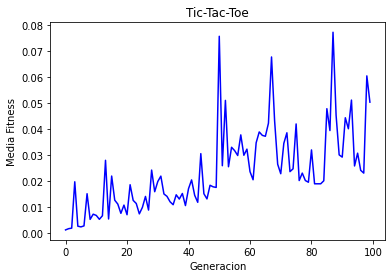

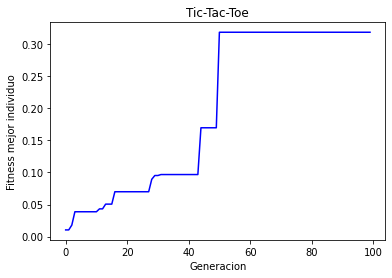

In [71]:
nGeneracion = [i for i in range(100)]
plt.plot(nGeneracion, media_fitness, color='blue')

plt.xlabel('Generacion')
plt.ylabel('Media Fitness')
plt.title('Tic-Tac-Toe')
plt.show()

plt.plot(nGeneracion, fitness_lista, color='blue')

plt.xlabel('Generacion')
plt.ylabel('Fitness mejor individuo')
plt.title('Tic-Tac-Toe')
plt.show()

<p style="font-size: medium"> En la gráfica de la media del fitness, podemos observar que, aunque, existen muchos datos atípicos, si estuviesen normalizados los datos, veríamos que va mejorando según aumenta el número de generaciones o épocas. </p>

<p style="font-size: medium"> Por otro lado, en la gráfica del fitness del mejor individuo, vemos como al principio mejora rápidamente, luego mejora del tirón, para mantenerse al final completamente constante, indicando así, que hemos encontrado al mejor individuo.</p>

<p style="font-size: medium"> Finalmente, podemos observar que el fitness máximo alcanzado llega a 0.3 ya que el rendimiento del algoritmo con el dataset de tic-tac-toe es bastante pobre. Esto lo podemos corroborar en las ejecuciones del apartado anterior.</p>

<h3> Titanic </h3>

In [10]:
start = time.time()

estrategia = ValidacionSimple(0.7, 1)
clasificador = ClasificadorAlgoritmoGenetico(pCruce=0.5, pMutacion=0.1, nGeneraciones=100, nReglas=3, nPoblacion=50, intra=False, todas=False)
error_ttt_grafica = clasificador.validacion(estrategia, dataset2, clasificador)[0]
mejores_individuo = clasificador.mediaFitness
fitness_lista = clasificador.mejorIndividuoFitness

end = time.time()

print('Tiempo de ejecución: ', end-start)

Tiempo de ejecución:  1115.8628289699554


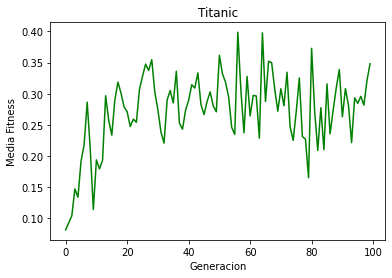

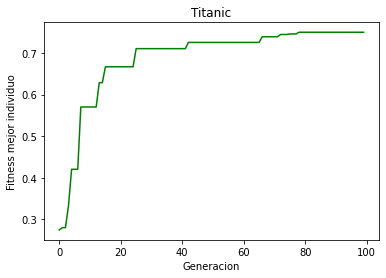

In [12]:
nGeneracion = [i for i in range(100)]
plt.plot(nGeneracion, mejores_individuo, color='green')

plt.xlabel('Generacion')
plt.ylabel('Media Fitness')
plt.title('Titanic')
plt.show()

plt.plot(nGeneracion, fitness_lista, color='green')

plt.xlabel('Generacion')
plt.ylabel('Fitness mejor individuo')
plt.title('Titanic')
plt.show()

<p style="font-size: medium"> En este caso, se repite el comportamiento para la media de la fitness. Podemos observar claramente como su valor, aunque sufre varios altibajos, al final es mucho mejor que el del comienzo.</p>

<p style="font-size: medium"> En el caso del mejor individuo, empieza muy mal y crece muy rápido, hasta llegar a la generación 20, en donde se empieza a estabilizar y se mantiene casi en el mismo hasta el final de la ejecución.</p>


<p style="font-size: medium"> Cabe comentar, quizás, que en el dataset de Tic-Tac-Toe, se encuentra el mejor individuo mucho más rápido que en el de Titanic. En Tic-Tac-Toe lo obtenemos al rededor de la generación 60, mientras que en Titanic, al rededor de la 70. Además, vemos como el fitness máximo es mucho mayor al de Tic-Tac-Toe, ya que en Titanic el rendimiento es más elevado.</p>

<h2> Análisis ROC </h2>
<p style="font-size: medium"> Para el análisis ROC utilizaremos nuestra implementación pero sin utilizar ningún tipo de estrategia de particionado. Incluiremos FPR y TPR de cada uno de los clasificadores discutidos en los apartados anteriores.</p>

<h3> Obtención de los datos </h3>

In [21]:
dataset = pd.read_csv('data/tic-tac-toe.data')
dataset2 = pd.read_csv('data/titanic.data')

In [22]:
encodedDataset = preprocessing.OneHotEncoder(sparse=False)
x = dataset.iloc[:,:-1]
x2 = dataset2.iloc[:,:-1]

encodedDataset.fit(x)
x_ttt = encodedDataset.transform(x) #Cogemos todos los datos menos la columna de Class
y_ttt = dataset.iloc[:,-1]

encodedDataset.fit(x2)
x_t = encodedDataset.transform(x2) #Cogemos todos los datos menos la columna de Class
y_t = dataset2.iloc[:,-1]

<p style="font-size: medium"> A continuación, los cálculos pertinentes.</p>

<h3> Naive Bayes (Curva ROC)</h3>

<h4> Tic-Tac-Toe dataset </h4>
<p style="font-size: medium">A continuación, calcularemos la matriz de confusión.</p>

In [26]:
# Alpha corresponde a la corrección de LaPlace
clasificador_ttt = naive_bayes.MultinomialNB(alpha=1)
clasificador_ttt.fit(x_ttt, y_ttt)

MultinomialNB(alpha=1)

<h4> Titanic dataset </h4>
<p style="font-size: medium">A continuación, calcularemos la matriz de confusión.</p>

In [27]:
# Alpha corresponde a la corrección de LaPlace
clasificador_t = naive_bayes.MultinomialNB(alpha=1)
clasificador_t.fit(x_t, y_t)

MultinomialNB(alpha=1)

<h3> Algoritmo Genético (Espacio ROC) y Naive Bayes (Curva ROC)</h3>

In [13]:
dataset = Datos('data/tic-tac-toe.data')
dataset2 = Datos('data/titanic.data')

<h4> Tic-Tac-Toe dataset </h4>

In [14]:
clasificador = ClasificadorAlgoritmoGenetico(pCruce=0.5, pMutacion=0.1, nGeneraciones=100, nReglas=3, nPoblacion=50, intra=False, todas=False)
clasificador.entrenamiento(dataset.datos, dataset.nominalAtributos, dataset.diccionario)
predicciones = clasificador.clasifica(dataset.datos, dataset.nominalAtributos, dataset.diccionario)
clases = list(dataset.datos.iloc[:, -1])
matrix_ttt = confusion_matrix(clases, predicciones)
print(matrix_ttt)

[[ 76 256]
 [169 457]]


In [15]:
FPR_ttt = matrix_ttt[0][1] / (matrix_ttt[0][1] + matrix_ttt[1][1])
TPR_ttt = matrix_ttt[0][0] /(matrix_ttt[0][0] + matrix_ttt[1][0])

<h4> Titanic dataset </h4>

In [16]:
clasificador = ClasificadorAlgoritmoGenetico(pCruce=0.5, pMutacion=0.1, nGeneraciones=100, nReglas=3, nPoblacion=50, intra=False, todas=False)
clasificador.entrenamiento(dataset2.datos, dataset2.nominalAtributos, dataset2.diccionario)
predicciones = clasificador.clasifica(dataset2.datos, dataset2.nominalAtributos, dataset2.diccionario)
clases = list(dataset2.datos.iloc[:, -1])
matrix_t = confusion_matrix(y_true=clases, y_pred=predicciones)
print(matrix_t)

[[509 110]
 [127 300]]


In [17]:
FPR_t = matrix_t[0][1] / (matrix_t[0][1] + matrix_t[1][1])
TPR_t = matrix_t[0][0] /(matrix_t[0][0] + matrix_t[1][0])

<h4> Gráficas </h4>

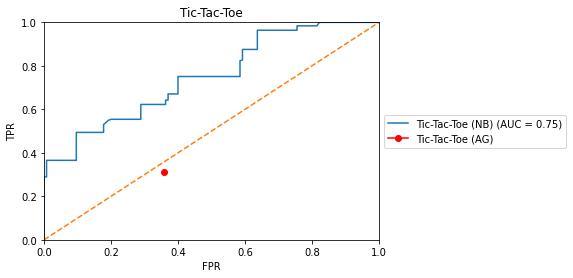

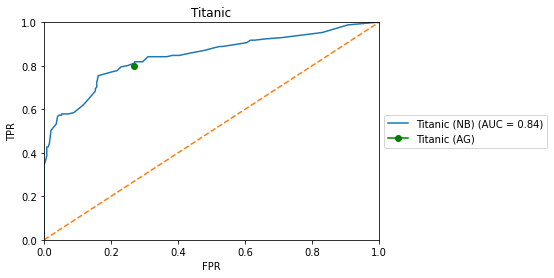

In [28]:
#Plotteamos las gráficas
metrics.plot_roc_curve(clasificador_ttt, x_test_ttt, y_test_ttt, name='Tic-Tac-Toe (NB)')
plt.plot(FPR_ttt, TPR_ttt, color='red', marker='o', label='Tic-Tac-Toe (AG)')
plt.plot( [0,1],[0,1], ls='--') #Linea diagonal

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Tic-Tac-Toe')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


metrics.plot_roc_curve(clasificador_t, x_test_t, y_test_t, name='Titanic (NB)')
plt.plot(FPR_t, TPR_t, color='green', marker='o', label='Titanic (AG)')

plt.plot( [0,1],[0,1], ls='--') #Linea diagonal

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Titanic')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

<p style="font-size: medium"> Viendo las gráficas es fácil notar que para Tic-Tac-Toe, el algoritmo genético va bastante mal. Está por debajo de la diagonal, lo que significa que funciona incluso peor que si lo dejasemos a suertes. Es importante destacar que este resultado corresponde a la ejecución realiza. Si se quisiera volver a ejecutar, podría cambiar ligeramente. Sin embargo, no debería de ser el algoritmo genético mucho mejor que Naive Bayes.</p>

<p style="font-size: medium"> En cuanto a Titanic, el algoritmo acierta bastantes veces, es decir, vemos que está por encima y alejado de la diagonal que representa las decisiones aleatorias. Naive Bayes también funciona bastante bien, por su parte. Ambos están bastante igualados en cuanto a funcionamiento con este dataset en concreto.</p>

<p style="font-size: medium"> Por último, queríamos destacar un comentario que se nos ha venido a la mente durante la realización de esta práctica. Una mejora interesante hubiese sido basar el porcentaje de elitismo sobre la proporcionalidad del fitness, es decir, que este porcentaje vaya creciendo a medida de que la media del fitness fuese aumentando y decreciendo en el caso contrario. </p>

<p style="font-size: medium"> </p>

<p style="font-size: medium"> </p>

<p style="font-size: medium"> </p>